In [1]:
!pip install yfinance scikit-learn matplotlib


In [2]:
import yfinance as yf

# Download Netflix stock data
data = yf.download('NFLX', start='2018-01-01', end='2024-06-20')
data.head()


/tmp/ipython-input-2-3216156647.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('NFLX', start='2018-01-01', end='2024-06-20')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2018-01-02,201.070007,201.649994,195.419998,196.100006,10966900
2018-01-03,205.050003,206.210007,201.500000,202.050003,8591400
2018-01-04,205.630005,207.050003,204.000000,206.199997,6029600
2018-01-05,209.990005,210.020004,205.589996,207.250000,7033200
2018-01-08,212.050003,212.500000,208.440002,210.020004,5580200


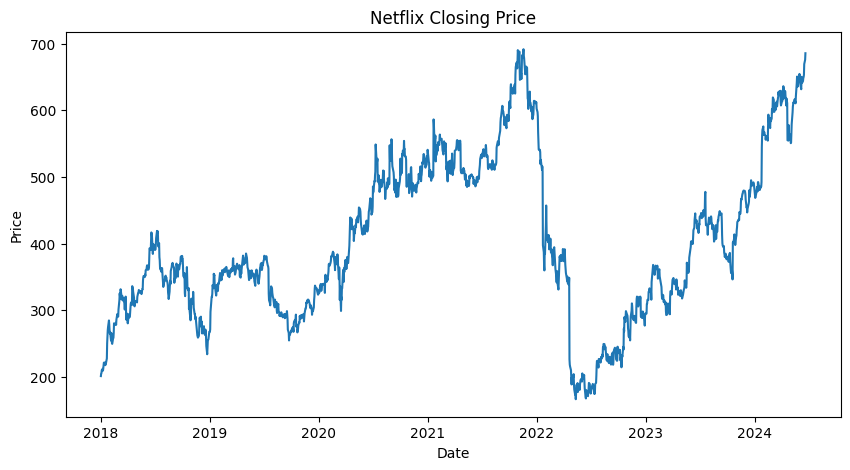

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title('Netflix Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [4]:
# Select features and target
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 15.680561979087758


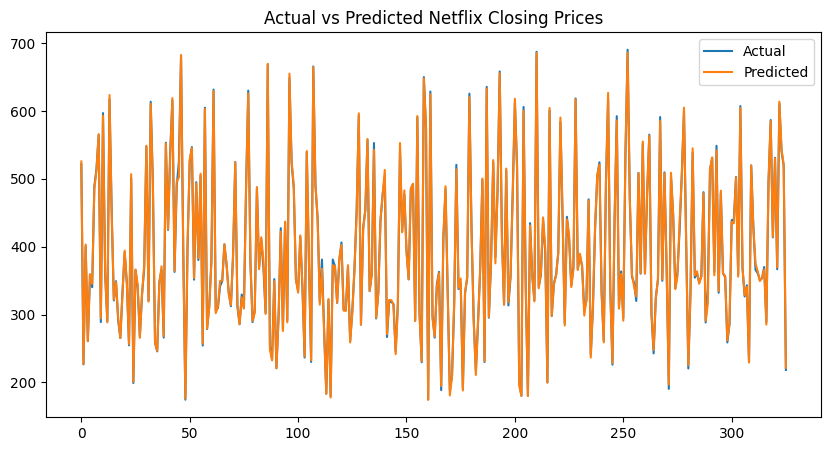

In [6]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Netflix Closing Prices')
plt.show()
